Courtesy of https://jrtechs.net/data-science/cuda-vs-cpu-performance

In [1]:
import torch
import time # times in seconds
import matplotlib.pyplot as plt

def time_torch(size):
    x = torch.rand(size, size, device=torch.device("cuda"))
    start = time.time()
    x.sin_()
    end = time.time()
    return(end - start)

def time_cpu(size):
    x = torch.rand(size, size, device=torch.device("cpu"))
    start = time.time()
    x.sin_()
    end = time.time()
    return(end - start)

def get_cuda_cpu_times(sizes):
    cpuTimes = []
    cudaTimes = []

    for s in sizes:
        cpuTimes += [time_cpu(s)]
        cudaTimes += [time_torch(s)]
    return cpuTimes, cudaTimes

def plot_cuda_vs_cpu(cpuTimes, cudaTimes, sizes, xLab="Matrix Width"):
    plt.title("CUDA vs CPU")
    cpu_plot = plt.plot(sizes, cpuTimes, label="CPU")
    cuda_plot = plt.plot(sizes, cudaTimes, label="CUDA")
    plt.legend(bbox_to_anchor=(0.8, 0.98), loc='upper left', borderaxespad=0.)
    plt.xlabel(xLab)
    plt.ylabel('Execution Time (Seconds)')
    plt.show()

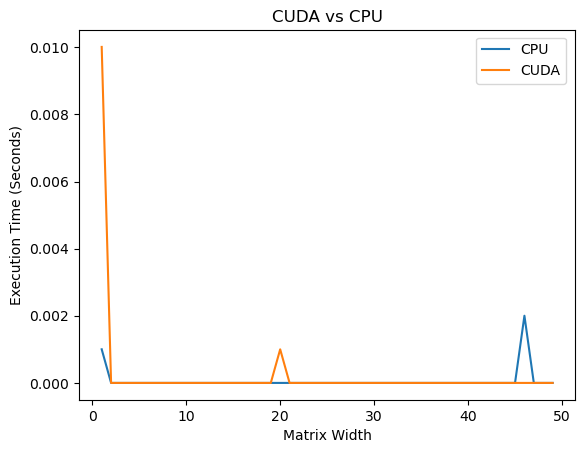

In [2]:
sizes = range(1, 50, 1)
cpu_t, cuda_t = get_cuda_cpu_times(sizes)
plot_cuda_vs_cpu(cpu_t, cuda_t, sizes)

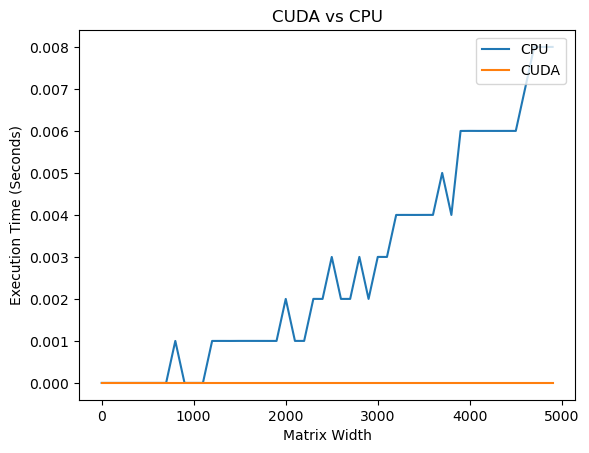

In [3]:
sizes = range(1, 5000, 100)
cpu_t, cuda_t = get_cuda_cpu_times(sizes)
plot_cuda_vs_cpu(cpu_t, cuda_t, sizes)

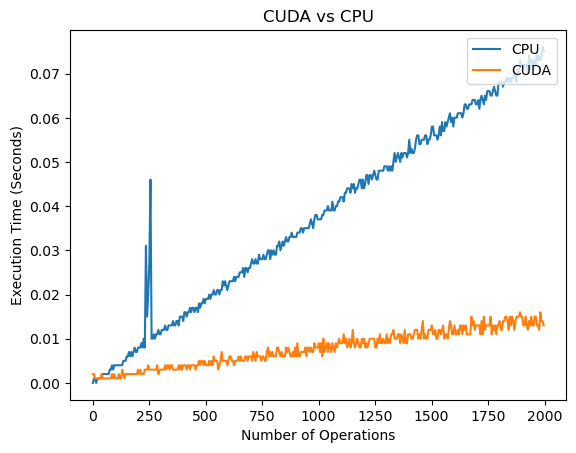

In [7]:
def time_torch_operation_repetition(size, iterations):
    x = torch.rand(size, size, device=torch.device("cpu"))
    start = time.time()
    x = x.cuda()
    for _ in range(0, iterations):
        x.sin()
    end = time.time()
    return(end - start)

def time_cpu_operation_repetition(size, iterations):
    x = torch.rand(size, size, device=torch.device("cpu"))
    start = time.time()
    for _ in range(0, iterations):
        x.sin()
    end = time.time()
    return(end - start)

def get_cuda_cpu_times_with_iterations(iterations):
    cpuTimes = []
    cudaTimes = []
    for i in iterations:
        cpuTimes += [time_cpu_operation_repetition(300, i)]
        cudaTimes += [time_torch_operation_repetition(300, i)]
    return cpuTimes, cudaTimes

iterations = range(1, 2000, 5)
cpu_t, cuda_t = get_cuda_cpu_times_with_iterations(iterations)
plot_cuda_vs_cpu(cpu_t, cuda_t, iterations, xLab="Number of Operations")

In [11]:
def get_cuda_times(sizes):
    cudaTimes = []

    for s in sizes:
        cudaTimes += [time_torch(s)]
    return cudaTimes

def plot_cuda_vs_cpu(cudaTimes, sizes, xLab="Matrix Width"):
    plt.title("CUDA")
    cuda_plot = plt.plot(sizes, cudaTimes, label="CUDA")
    plt.legend(bbox_to_anchor=(0.8, 0.98), loc='upper left', borderaxespad=0.)
    plt.xlabel(xLab)
    plt.ylabel('Execution Time (Seconds)')
    plt.show()

def get_cuda_times_with_iterations(iterations):
    cudaTimes = []
    for i in iterations:
        cudaTimes += [time_torch_operation_repetition(300, i)]
    return cudaTimes



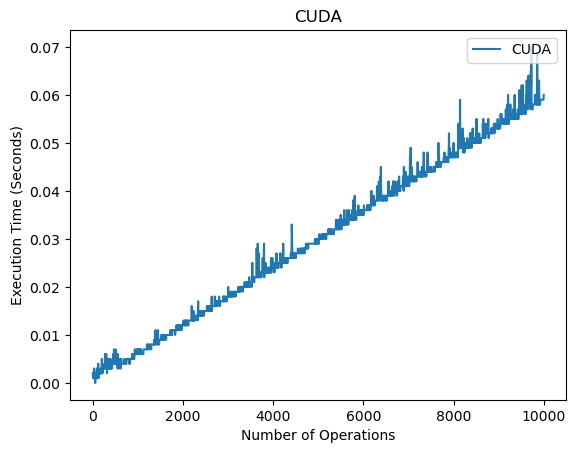

In [14]:
iterations = range(1, 10000, 5)
cuda_t = get_cuda_times_with_iterations(iterations)
plot_cuda_vs_cpu(cuda_t, iterations, xLab="Number of Operations")